In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import roc_curve, auc
import scipy.stats as stats
import time
from sklearn.preprocessing import MinMaxScaler
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import RegexpTokenizer as regextoken
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk import FreqDist, bigrams, trigrams
from nltk import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from warnings import simplefilter
from pandas.core.common import SettingWithCopyWarning
from sklearn.feature_selection import chi2, SelectKBest, f_classif, f_regression
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
from sklearn import feature_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from tqdm import tqdm
import re
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fetih.kaya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fetih.kaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fetih.kaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
pd.set_option('display.max_columns', None)

# DATA EXPLORATION AND PREPROCESSING

In [4]:
#Loading the dataset
zomato = pd.read_csv("C:/Users/fetih.kaya/Desktop/zomato.csv")

### GENERAL INFORMATION OF THE DATA

In [5]:
#General information about the dataset
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [6]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Descriptions of column labels;
- url: url of the restaurant in the zomato website
- address: address of the restaurants in Bangalore
- name: name of the restaurant
- online_order: whether online ordering is available or not
- book_table: whether table booking is available or not
- rate: overall rating score of the restaurant out of 5
- votes: total number of ratings for the restaurant
- phone: phone number of the restaurant
- location: neighborhood of the restaurant
- rest_type: type of the restaurant
- dish_liked: dishes people liked in the restaurant
- cuisines: available food styles in the restaurant 
- approx_cost(for two people): approximate meal cost for two people
- reviews_list: visitor comments for the restaurant
- menu_item:  list of dishes in menu
- listed_in(type): general type of restaurant
- listed_in(city): region of restaurant in the city





### DATA CLEANING

##### Correct disturbing data entries 

In [7]:
#Changing some columns' names
zomato = zomato.rename(columns={"approx_cost(for two people)":"approx_cost","listed_in(type)":"general_type","listed_in(city)":"region"})

In [8]:
#Changing datatype of "approx_cost" column from object to float and remove thousands seperator
zomato['approx_cost'] = zomato['approx_cost'].astype(str).apply(lambda x: x.replace(',',''))
zomato['approx_cost'] = zomato['approx_cost'].astype(float)

In [9]:
#For "rate" column: drop "/5" part - change datatype from object to float - fix noisy entries
zomato['rate'] = zomato['rate'].astype(str).apply(lambda x: x.split('/')[0])
while True:
    try:
        zomato['rate'] = zomato['rate'].astype(float)
        break
    except ValueError as e1:
        noise_entry = str(e1).split(":")[-1].strip().replace("'", "")
        zomato['rate'] = zomato['rate'].apply(lambda x: x.replace(noise_entry, str(np.nan)))

In [10]:
# Correcting the noisy restaurant name entries
zomato['name'] = zomato['name'].apply(lambda x: 'Santa Spa Cuisine' if x == 'SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Cafe Down The Alley' if x == 'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Cafe Shangri-La Hotel' if x == 'b CafÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚Â‚ÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚Â© - Shangri-La Hotel' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'WAFL Cafe' if x == 'WAFL CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'WAFL Cafe' if x == 'WAFL CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'WAFL Cafe' if x == 'WAFL CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Yauatcha Patisserie' if x == 'Yauatcha PÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¢tisserie' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Yauatcha Patisserie' if x == 'Yauatcha PÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¢tisserie' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Yauatcha Patisserie' if x == 'Yauatcha PÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¢tisserie' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Bohra Bohra Cafe' if x == 'Bohra Bohra CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Cafe Felix' if x == 'CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Felix' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Cafe Morish' if x == "CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Mor'ish" else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Cafe Felix' if x == 'CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Felix' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Cafe Morish' if x == "CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Mor'ish" else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Cafe Secret Alley' if x == 'CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Secret Alley' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Cafe Felix' if x == 'CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Felix' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Cafe Morish' if x == "CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Mor'ish" else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Cafe Secret Alley' if x == 'CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Secret Alley' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'DS Juice Cafe & Grill ' if x == 'DS Juice CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© & Grill' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Draggers Cafe' if x == 'Draggers CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Draggers Cafe' if x == 'Draggers CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Foreign Cafe' if x == 'Foreign CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Foreign Cafe' if x == 'Foreign CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Kaza' if x == 'KazÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Kaza' if x == 'KazÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Le Casse Croute' if x == 'Le Casse CroÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ»te' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Le Casse Croute' if x == 'Le Casse CroÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ»te' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Ludo Cafe' if x == 'Ludo CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Moto Store & Cafe' if x == 'Moto Store & CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Moto Store & Cafe' if x == 'Moto Store & CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Moto Store & Cafe' if x == 'Moto Store & CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: "Mum's Kitchen" if x == 'MumÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂs Kitchen' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Sector 7 Cafe' if x == 'Sector 7 CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Sector 7 Cafe' if x == 'Sector 7 CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Urban Solace - Cafe for the Soul' if x == 'Urban Solace - CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© for the Soul' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Urban Solace - Cafe for the Soul' if x == 'Urban Solace - CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© for the Soul' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Urban Solace - Cafe for the Soul' if x == 'Urban Solace - CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© for the Soul' else x)
zomato['name'] = zomato['name'].apply(lambda x: 'Cafe Shangri-La Hotel' if x == 'b CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© - Shangri-La Hotel' else x)

In [11]:
#Define empty rows of menu_item as None
for i in range(zomato.shape[0]):
    if zomato.menu_item[i] == '[]':
        zomato.menu_item[i] = None

C:\Users\fetih.kaya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


##### Missing data handling

In [12]:
#Missing value search
number_of_missing_data = (zomato.isnull().sum()).sort_values(ascending=False)
number_of_missing_data = pd.DataFrame(number_of_missing_data, columns=['# of missing values'])                                                                    
percentage_of_missing_data = (zomato.isnull().sum()/zomato.shape[0]*100).sort_values(ascending=False)
percentage_of_missing_data = pd.DataFrame(percentage_of_missing_data, columns=['% of missing part'])
missing = pd.concat([number_of_missing_data,percentage_of_missing_data], axis=1) 

missing
       

,# of missing values,% of missing part
menu_item,39617,76.603438
dish_liked,28078,54.291626
rate,10052,19.436549
phone,1208,2.335789
approx_cost,346,0.669026
rest_type,227,0.438927
cuisines,45,0.087012
location,21,0.040606
book_table,0,0.000000
address,0,0.000000


In [13]:
#Unique entry quantities of each attributes
zomato.nunique()

url             51717
address         11495
name             8774
online_order        2
book_table          2
rate               31
votes            2328
phone           14926
location           93
rest_type          93
dish_liked       5271
cuisines         2723
approx_cost        70
reviews_list    22513
menu_item        9097
general_type        7
region             30
dtype: int64

In [14]:
#Remove dish_liked attribute
#because it has many missing value and many unique entries that makes impossible to fill them in a logical way 
zomato = zomato.drop(['dish_liked'], axis=1) 

In [15]:
#Remove menu_item attribute
#because it has many missing value and many unique entries that makes impossible to fill them in a logical way 
zomato = zomato.drop(['menu_item'], axis=1) 

In [16]:
#Remove missing value containing rows 
#because most of them originates from 'rate' attribute which will be used as target variable on modelling so it should be original
#also still have enough data - Remaining part = 40.687 rows
zomato = zomato.dropna(how='any')
zomato = zomato.reset_index(drop=True)

##### Duplicated data handling  

In [17]:
#Search for duplicated rows
zomato.duplicated().value_counts()

False    40687
dtype: int64

In [18]:
#Remove duplicated rows 
zomato = zomato.drop_duplicates()

##### Remove outliers

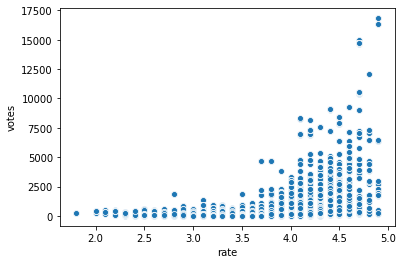

In [19]:
#Outliers that originates from 'votes' attribute
sns.scatterplot(y="votes", x="rate", data= zomato)

In [20]:
#Remove outliers
for i in range(zomato.shape[0]):
    if zomato.votes[i] > 12500:
        zomato = zomato.drop(i, axis=0)
        
zomato = zomato.reset_index(drop=True)

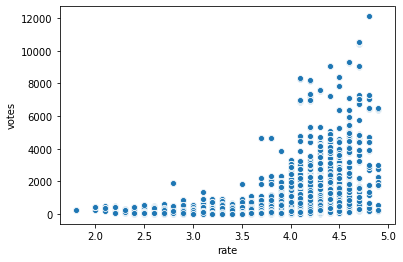

In [21]:
#Outliers that originates from 'votes' attribute
sns.scatterplot(y="votes", x="rate", data= zomato)

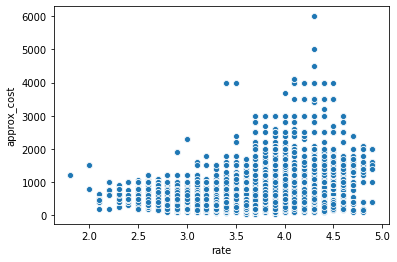

In [22]:
#Outliers that originates from 'approx_cost' attribute
sns.scatterplot(y="approx_cost", x="rate", data= zomato)

In [23]:
#Remove outliers
for i in range(zomato.shape[0]):
    if (zomato.rate[i] < 2.1 and zomato.approx_cost[i] > 1000) or (2.8 < zomato.rate[i] < 3.1 and zomato.approx_cost[i] > 1500) or (3.3 < zomato.rate[i] < 3.6 and zomato.approx_cost[i] > 3500) or (zomato.rate[i] == 4.3 and zomato.approx_cost[i] > 4000):
        zomato = zomato.drop(i, axis=0)

zomato = zomato.reset_index(drop=True)

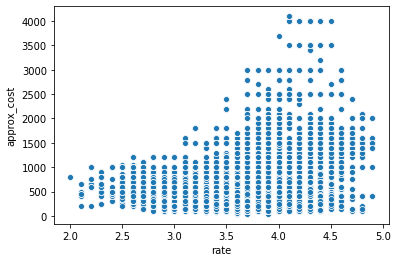

In [24]:
#Outliers that originates from 'approx_cost' attribute
sns.scatterplot(y="approx_cost", x="rate", data= zomato)

### DATA REDUCTION

##### Remove redundant attributes

In [25]:
#Remove redundant columns; "url","address" and "phone" - keeping "location" column for address information
zomato = zomato.drop(['url','address','phone'], axis=1)

##### Remove the rows which have unreliable rate

In [26]:
#Removo rows whose number of votes is smaller than 50, because rate data of restaurants is given in 0.1 changing intervals
#Adding 1 more vote to a restaurant whose vote number is smaller than 50, may cause more than 0.1 change on average rate
#Having more than 50 votes guarantees that the restaurants average rate will not change more than 0.1 by adding 1 more vote
#It means that restaurant's rate is settled and reliable 
zomato = zomato[zomato.votes > 49]
zomato = zomato.reset_index(drop=True)

##### Numerosity reduction - sampling

In [27]:
#Reducing number of entries by stratified sampling to ease modelling by using a small dataset which represents the whole
zomato_ = zomato
zomato_ = zomato_.drop(['rate'], axis=1)
zomato_x = zomato_
zomato_y = zomato.loc[:,"rate"]

x_train, x_test, y_train, y_test = train_test_split(zomato_x, zomato_y, test_size=0.25)

zomato_m =pd.concat([x_test,y_test], axis=1)
zomato_m  = zomato_m.reset_index(drop=True)

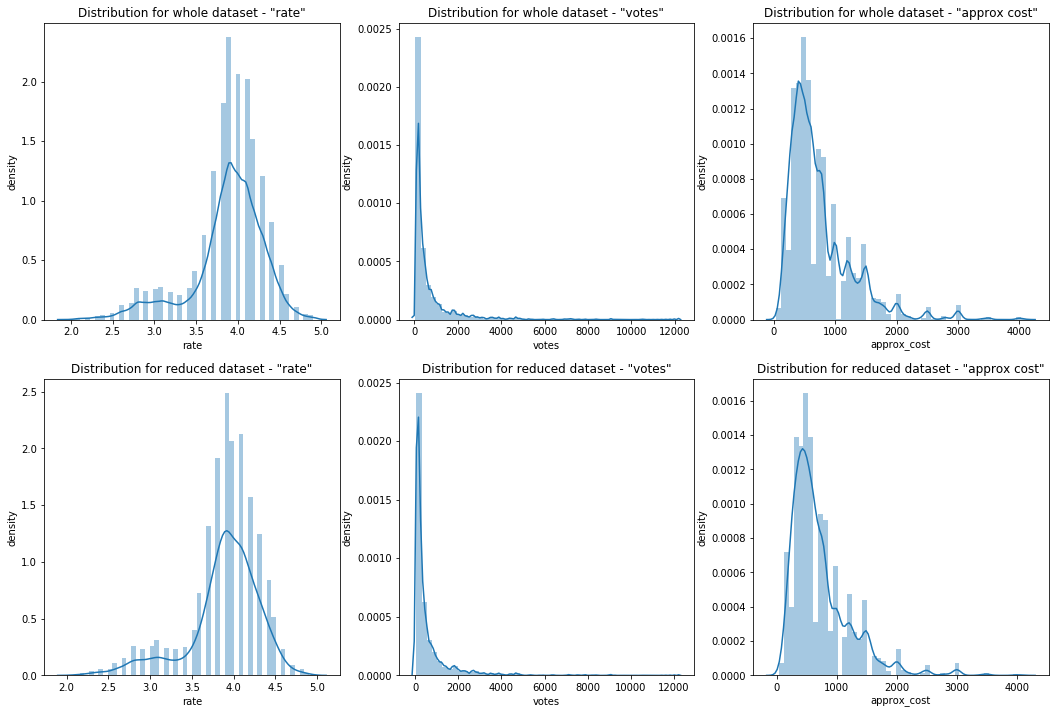

In [28]:
f, ax = plt.subplots(2,3)
f.set_size_inches(18,12)

sns.distplot(zomato.rate.sort_values(), ax = ax[0,0]); ax[0,0].set_xlabel('rate'); ax[0,0].set_ylabel('density');
sns.distplot(zomato_m.rate.sort_values(), ax = ax[1,0]); ax[1,0].set_xlabel('rate'); ax[1,0].set_ylabel('density');
sns.distplot(zomato.votes.sort_values(), ax = ax[0,1]); ax[0,1].set_xlabel('votes'); ax[0,1].set_ylabel('density');
sns.distplot(zomato_m.votes.sort_values(), ax = ax[1,1]); ax[1,1].set_xlabel('votes'); ax[1,1].set_ylabel('density');
sns.distplot(zomato.approx_cost.sort_values(), ax = ax[0,2]); ax[0,2].set_xlabel('approx_cost'); ax[0,2].set_ylabel('density');
sns.distplot(zomato_m.approx_cost.sort_values(), ax = ax[1,2]); ax[1,2].set_xlabel('approx_cost'); ax[1,2].set_ylabel('density');


ax[0,0].set_title('Distribution for whole dataset - "rate"');
ax[0,1].set_title('Distribution for whole dataset - "votes"');
ax[0,2].set_title('Distribution for whole dataset - "approx cost"');
ax[1,0].set_title('Distribution for reduced dataset - "rate"');
ax[1,1].set_title('Distribution for reduced dataset - "votes"');
ax[1,2].set_title('Distribution for reduced dataset - "approx cost"');

In [29]:
zomato_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5919 entries, 0 to 5918
Data columns (total 12 columns):
name            5919 non-null object
online_order    5919 non-null object
book_table      5919 non-null object
votes           5919 non-null int64
location        5919 non-null object
rest_type       5919 non-null object
cuisines        5919 non-null object
approx_cost     5919 non-null float64
reviews_list    5919 non-null object
general_type    5919 non-null object
region          5919 non-null object
rate            5919 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 555.0+ KB


### DATA TRANSFORMATION

##### Data transformation

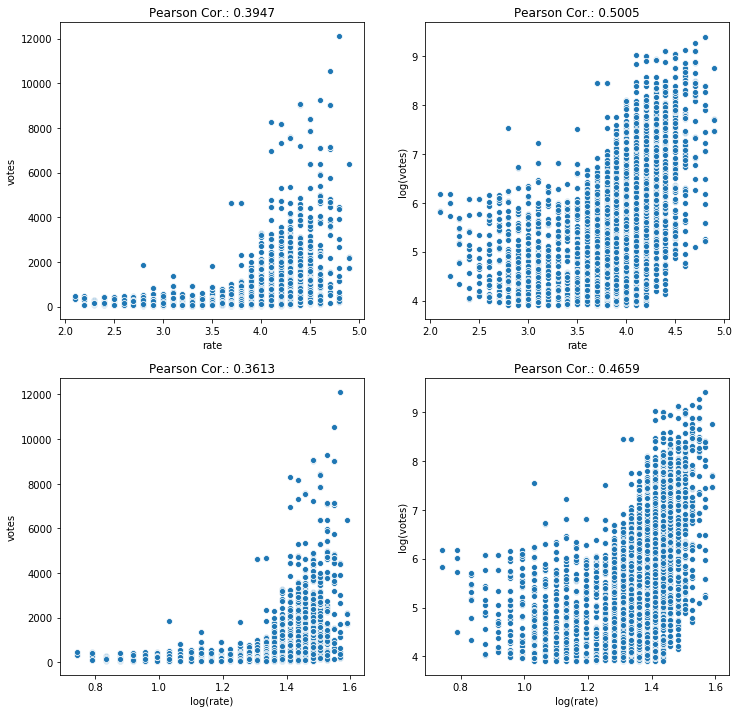

In [30]:
#log transformation for numerical attributes; 
#for 'votes'
f, ax = plt.subplots(2,2)
f.set_size_inches(12,12)

sns.scatterplot(y="votes", x="rate", data= zomato_m, ax = ax[0,0]); ax[0,0].set_xlabel('rate'); ax[0,0].set_ylabel('votes');
sns.scatterplot(y=np.log(zomato_m.votes), x="rate", data= zomato_m, ax = ax[0,1]); ax[0,1].set_xlabel('rate'); ax[0,1].set_ylabel('log(votes)');
sns.scatterplot(x=np.log(zomato_m.rate), y="votes", data= zomato_m, ax = ax[1,0]); ax[1,0].set_xlabel('log(rate)'); ax[1,0].set_ylabel('votes');
sns.scatterplot(x=np.log(zomato_m.rate), y=np.log(zomato_m.votes), data= zomato_m, ax = ax[1,1]); ax[1,1].set_xlabel('log(rate)'); ax[1,1].set_ylabel('log(votes)');


ax[0,0].set_title('Pearson Cor.: {0:.4f}'.format(stats.pearsonr(zomato_m.votes, zomato_m.rate)[0]));
ax[0,1].set_title('Pearson Cor.: {0:.4f}'.format(stats.pearsonr(np.log(zomato_m.votes), zomato_m.rate)[0]));
ax[1,0].set_title('Pearson Cor.: {0:.4f}'.format(stats.pearsonr(zomato_m.votes, np.log(zomato_m.rate))[0]));
ax[1,1].set_title('Pearson Cor.: {0:.4f}'.format(stats.pearsonr(np.log(zomato_m.votes), np.log(zomato_m.rate))[0]));


In [31]:
#log(votes)-rate correlation is higher than votes-rate correlation so that transform votes attribute values to logarithmic
votes = zomato_m.votes
zomato_m = zomato_m.drop(['votes'], axis=1)
zomato_m['votes'] = np.log(votes)
    

### DATA DISCRETIZATION

##### Concept hierarchy discretization for approx_cost attribute

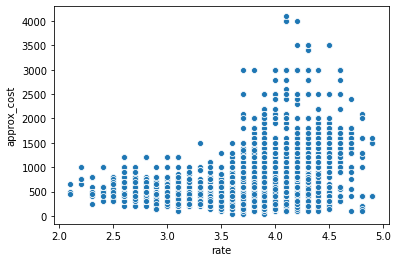

In [32]:
sns.scatterplot(x='rate', y='approx_cost', data=zomato_m)

In [33]:
zomato_m.approx_cost.describe()

count    5919.000000
mean      722.356817
std       495.409311
min        40.000000
25%       400.000000
50%       600.000000
75%       900.000000
max      4100.000000
Name: approx_cost, dtype: float64

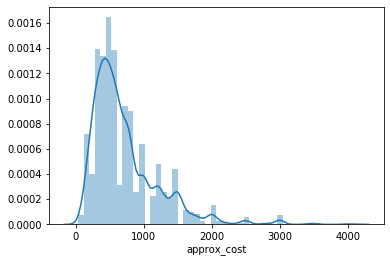

In [34]:
sns.distplot(zomato_m.approx_cost.sort_values())

In [35]:
#Apply discretization
mean = zomato_m.approx_cost.mean()
std = np.std(zomato_m.approx_cost)
minimum = zomato_m.approx_cost.min()
maximum = zomato_m.approx_cost.max()
percent25 = 400
percent50 = 600
percent75 = 900

approx_cost = zomato_m.approx_cost
zomato_m = zomato_m.drop(['approx_cost'], axis=1)

for i in range(zomato_m.shape[0]):
    if minimum <= approx_cost[i] < (mean - std):
        approx_cost[i] = 'very cheap'
        continue
    if (mean - std) <= approx_cost[i] < percent25:
        approx_cost[i] = 'cheap'
        continue
    if percent25 <= approx_cost[i] < percent75:
        approx_cost[i] = 'medium'
        continue
    if percent75 <= approx_cost[i] < (mean + std):
        approx_cost[i] = 'expensive'
        continue
    if (mean + std) <= approx_cost[i] <= maximum:
        approx_cost[i] = 'very expensive'
        continue       
zomato_m = pd.concat([zomato_m,approx_cost], axis=1)

zomato_m['approx_cost'] = zomato_m['approx_cost'].astype(str)

### FEATURE SELECTION

##### Chi2 correlation

In [36]:
le = LabelEncoder()
X = zomato_m.loc[:,'name':'region']
X = X.select_dtypes(include=np.object) # select string columns
X = X.apply(LabelEncoder().fit_transform)
y = le.fit_transform(zomato_m.loc[:,'rate'])
chi2, pval=feature_selection.chi2(X, y)
sorted_idx = np.argsort(chi2)[::-1]
sorted_vals = np.sort(chi2)[::-1]


d = {"features":X.columns[sorted_idx], "values":sorted_vals, "p-values":pval[sorted_idx]}
df = pd.DataFrame(d)
df

,features,values,p-values
0,reviews_list,555051.950073,0.000000e+00
1,name,51126.854714,0.000000e+00
2,cuisines,19316.444520,0.000000e+00
3,rest_type,4127.456151,0.000000e+00
4,location,2997.126720,0.000000e+00
5,book_table,839.660313,9.758501e-159
6,region,255.253048,1.591077e-38
7,online_order,55.020050,1.690599e-03
8,general_type,26.741375,5.323619e-01


##### Kendall Tau correlation 

In [37]:
zomato_cat = zomato_m.select_dtypes(include=object)

attributes = []
cor_values = []
p_values = []

for i in range(len(zomato_cat.columns)):
    attributes.append(zomato_cat.columns[i])
    cor_val, p_val = stats.kendalltau(zomato_cat.iloc[:,i], zomato_m.loc[:,'rate'])
    cor_values.append(cor_val)
    p_values.append(p_val)

df1 = pd.DataFrame(attributes, columns = ["Attributes"])
df2 = pd.DataFrame(cor_values, columns = ["Kendall Tau Corr."])
df3 = pd.DataFrame(p_values, columns = ["P-Values"])

df2 = df2.abs()

df  = pd.concat([df1,df2,df3], axis=1)
df  = df.sort_values(["Kendall Tau Corr."], ascending = False)
df  = df.reset_index(drop=True)

df

,Attributes,Kendall Tau Corr.,P-Values
0,book_table,0.346300,4.600882e-216
1,reviews_list,0.228731,4.784921e-142
2,rest_type,0.140315,1.583884e-47
3,approx_cost,0.131635,3.456240e-38
4,location,0.121202,5.161159e-40
5,online_order,0.102066,2.311164e-20
6,cuisines,0.068905,2.460376e-14
7,general_type,0.048345,2.792897e-06
8,region,0.036636,6.659966e-05
9,name,0.015480,8.598550e-02


There are just 3 numerical attributes and all of them are used, not put in a selection.
For categorical attributes; all attributes are used because their p-values are quite below of 5%

# DATA MODELLING 

### SUCCESS CRITERIA

##### Success criteria generation

In [38]:
#Calculate a threshold rate value for dividing successful and unsuccessful restaurants
#Take average rates of restaurants whose region, location, general_type and rest_type are same, for using as threshold 
group = zomato.groupby(['region','location','general_type','rest_type']).mean()

In [39]:
group = pd.read_csv("C:/Users/fetih.kaya/Desktop/group.csv") #regenerated group dataframe by filling all rows

##### Assign success score to each restaurant

In [40]:
#Generate a new "success" column and assign each restaurant's score: 1 for success 0 for fail
#Compare each restaurant's rate with average rate of restaurants which have same region, location, general_type and rest_type
#If a restaurant's rate is greater or equal to the average rate, it is counted as successful else failed
zomato_m["success"] = ""

for i in range(zomato_m.shape[0]):
    for j in range(group.shape[0]):
        if (zomato_m.loc[i,"rest_type"] == group.loc[j,"rest_type"] and zomato_m.loc[i,"location"] == group.loc[j,"location"] and zomato_m.loc[i,"region"] == group.loc[j,"region"] and zomato_m.loc[i,"general_type"] == group.loc[j,"general_type"]):
            if zomato_m.loc[i,"rate"] >= group.loc[j,"rate"]:
                zomato_m.loc[i,"success"] = 1
            else:
                zomato_m.loc[i,"success"] = 0
            break   
            
zomato_m['success'] = zomato_m['success'].astype('int')

##### Sentiment analysis

In [41]:
#Dİvide restaurants' name, rate and comments
all_ratings = []

for name,ratings in tqdm(zip(zomato_m['name'],zomato_m['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,score, doc])
            
rating_zomato_m=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_zomato_m['review']=rating_zomato_m['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

#Assign sentiments
rating_zomato_m['sentiment'] = ''

for i in range (rating_zomato_m.shape[0]):
    if rating_zomato_m.rating[i] > 3.5:
        rating_zomato_m.sentiment[i] = 1
        continue
    if rating_zomato_m.rating[i] < 2.5:
        rating_zomato_m.sentiment[i] = -1
        continue
    else:
        rating_zomato_m.sentiment[i] = 0
        continue

Positive = rating_zomato_m[rating_zomato_m['sentiment']==1]
Neutral = rating_zomato_m[rating_zomato_m['sentiment']==0]
Negative = rating_zomato_m[rating_zomato_m['sentiment']==-1]


#Most common words for positive sentiments
positive_reviews = Positive.review
positive_reviews = positive_reviews.apply(lambda x: x.lower())
tokenizer = regextoken("[a-zA-Z]+") 
positive_reviews = positive_reviews.apply(tokenizer.tokenize)
stop = stopwords.words("english")
stop.extend(["rated", "n", "nan", "x", "xa", "f", "good", "food", "chicken", "order", "ordered", "really", "ambience", "service", "place", "one", "time", "restaurant", "taste", "even"])
positive_reviews = positive_reviews.apply(lambda x: [token for token in x if token not in stop])
positive_all_reviews = positive_reviews.astype(str).str.cat()
positive_cleaned_reviews = tokenizer.tokenize(positive_all_reviews)



#Most common words for neutral sentiments
neutral_reviews = Neutral.review
neutral_reviews = neutral_reviews.apply(lambda x: x.lower())
tokenizer = regextoken("[a-zA-Z]+") 
neutral_reviews = neutral_reviews.apply(tokenizer.tokenize)
stop = stopwords.words("english")
stop.extend(["rated", "n", "nan", "x", "xa", "f", "good", "food", "chicken", "order", "ordered", "really", "ambience", "service", "place", "one", "time", "restaurant", "taste", "even"])
neutral_reviews = neutral_reviews.apply(lambda x: [token for token in x if token not in stop])
neutral_all_reviews = neutral_reviews.astype(str).str.cat()
neutral_cleaned_reviews = tokenizer.tokenize(neutral_all_reviews)



#Most common words for negative sentiments
negative_reviews = Negative.review
negative_reviews = negative_reviews.apply(lambda x: x.lower())
tokenizer = regextoken("[a-zA-Z]+") 
negative_reviews = negative_reviews.apply(tokenizer.tokenize)
stop = stopwords.words("english")
stop.extend(["rated", "n", "nan", "x", "xa", "f", "good", "food", "chicken", "order", "ordered", "really", "ambience", "service", "place", "one", "time", "restaurant", "taste", "even"])
negative_reviews = negative_reviews.apply(lambda x: [token for token in x if token not in stop])
negative_all_reviews = negative_reviews.astype(str).str.cat()
negative_cleaned_reviews = tokenizer.tokenize(negative_all_reviews)


5919it [00:03, 1623.34it/s]
C:\Users\fetih.kaya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\fetih.kaya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\fetih.kaya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

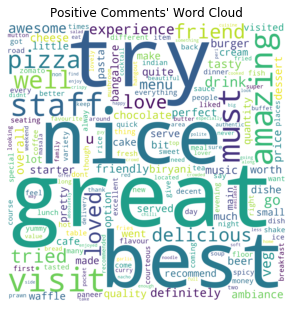

In [42]:
#WordClouds
positiveCR=' '.join(positive_cleaned_reviews)

# Create and generate a word cloud image:
wordcloud =WordCloud(max_font_size=None, background_color='white', collocations=False,
                          width=1500, height=1500).generate(positiveCR)

# Display the generated image:
plt.figure(figsize=(5,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Positive Comments' Word Cloud")
plt.axis("off")
plt.show()

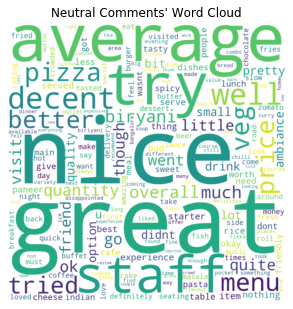

In [43]:
#WordClouds
neutralCR=' '.join(neutral_cleaned_reviews)

# Create and generate a word cloud image:
wordcloud =WordCloud(max_font_size=None, background_color='white', collocations=False,
                          width=1500, height=1500).generate(neutralCR)

# Display the generated image:
plt.figure(figsize=(5,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Neutral Comments' Word Cloud")
plt.axis("off")
plt.show()


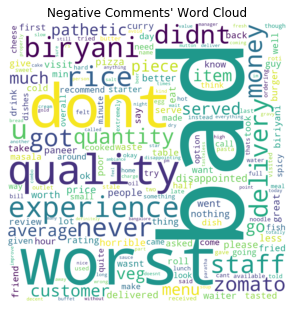

In [44]:
#WordClouds
negativeCR=' '.join(negative_cleaned_reviews)

# Create and generate a word cloud image:
wordcloud =WordCloud(max_font_size=None, background_color='white', collocations=False,
                          width=1500, height=1500).generate(negativeCR)

# Display the generated image:
plt.figure(figsize=(5,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Negative Comments' Word Cloud")
plt.axis("off")
plt.show()

### PREPARE ATTRIBUTES

##### Encode variables

In [45]:
#Assign dummy variables to name attribute
dummy_name = pd.get_dummies(zomato_m['name'])

zomato_m = zomato_m.drop(['name'], axis=1)
zomato_m = pd.concat([zomato_m,dummy_name], axis=1)

In [46]:
#Assign dummy variables to online_order attribute
zomato_m['online_order'] = zomato_m.online_order.map({'Yes':1, 'No':0})

In [47]:
#Assign dummy variables to book_table attribute
zomato_m['book_table'] = zomato_m.book_table.map({'Yes':1, 'No':0})

In [48]:
#Assign dummy variables to location attribute
dummy_location = pd.get_dummies(zomato_m['location'])

zomato_m = zomato_m.drop(['location'], axis=1)
zomato_m = pd.concat([zomato_m,dummy_location], axis=1)

In [49]:
#Assign dummy variables to rest_type attribute
zomato_m['rest_type'] = zomato_m['rest_type'].astype(str).apply(lambda x: x.split(', '))
dummy_rest_type = pd.get_dummies(zomato_m.rest_type.apply(pd.Series).stack()).sum(level=0)

zomato_m = zomato_m.drop(['rest_type'], axis=1)
zomato_m = pd.concat([zomato_m,dummy_rest_type], axis=1)

In [50]:
#Assign dummy variables to cuisines attribute
zomato_m['cuisines'] = zomato_m['cuisines'].astype(str).apply(lambda x: x.split(', '))
dummy_cuisines = pd.get_dummies(zomato_m.cuisines.apply(pd.Series).stack()).sum(level=0)

zomato_m = zomato_m.drop(['cuisines'], axis=1)
zomato_m = pd.concat([zomato_m,dummy_cuisines], axis=1)

In [51]:
#Assign dummy variables to approx_cost attribute
dummy_approx_cost = pd.get_dummies(zomato_m['approx_cost'])

zomato_m = zomato_m.drop(['approx_cost'], axis=1)
zomato_m = pd.concat([zomato_m,dummy_approx_cost], axis=1)

In [52]:
#Assign dummy variables to reviews_list attribute by using text mining
for i in range(zomato_m.shape[0]):
    if zomato_m.rate[i] > 3.5 :
        zomato_m.reviews_list[i] = 'positive'
        continue
    if zomato_m.rate[i] < 2.5 :
        zomato_m.reviews_list[i] = 'negative'
        continue
    else:
        zomato_m.reviews_list[i] = 'neutral'
        continue
    
zomato_m['reviews_list'] = zomato_m['reviews_list'].astype(str)

dummy_reviews_list = pd.get_dummies(zomato_m['reviews_list'])

zomato_m = zomato_m.drop(['reviews_list'], axis=1)
zomato_m = pd.concat([zomato_m,dummy_reviews_list], axis=1)

C:\Users\fetih.kaya\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [53]:
#Assign dummy variables to general_type attribute
zomato_m['general_type'] = zomato_m['general_type'].astype(str).apply(lambda x: x.split(', '))
dummy_general_type = pd.get_dummies(zomato_m.general_type.apply(pd.Series).stack()).sum(level=0)

zomato_m = zomato_m.drop(['general_type'], axis=1)
zomato_m = pd.concat([zomato_m,dummy_general_type], axis=1)

In [54]:
#Assign dummy variables to region attribute
zomato_m['region'] = zomato_m['region'].astype(str).apply(lambda x: x.split(', '))
dummy_region = pd.get_dummies(zomato_m.region.apply(pd.Series).stack()).sum(level=0)

zomato_m = zomato_m.drop(['region'], axis=1)
zomato_m = pd.concat([zomato_m,dummy_region], axis=1)

##### Split dependent variables and target variable

In [55]:
zomato_y = zomato_m.loc[:,'success']
zomato_m = zomato_m.drop(['success'], axis=1)
zomato_x = zomato_m

### HYPERPARAMETER TUNING

##### Random search

In [56]:
def report(results, n_top=30): #print all results
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [57]:
#Logistic Regression random search
clf = LogisticRegression()
param_grid = {"solver": ["lbfgs", "liblinear"],
              "max_iter": [5, 10, 25, 50, 100 ,200, 500, 1000],
             }

n_iter_search = 15
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter_search, cv=5)

simplefilter('ignore')

start = time.time()
random_search.fit(zomato_x, zomato_y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 269.78 seconds for 15 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.875 (std: 0.011)
Parameters: {'solver': 'lbfgs', 'max_iter': 100}

Model with rank: 2
Mean validation score: 0.874 (std: 0.012)
Parameters: {'solver': 'lbfgs', 'max_iter': 200}

Model with rank: 3
Mean validation score: 0.874 (std: 0.012)
Parameters: {'solver': 'lbfgs', 'max_iter': 1000}

Model with rank: 3
Mean validation score: 0.874 (std: 0.012)
Parameters: {'solver': 'lbfgs', 'max_iter': 500}

Model with rank: 5
Mean validation score: 0.869 (std: 0.012)
Parameters: {'solver': 'liblinear', 'max_iter': 1000}

Model with rank: 5
Mean validation score: 0.869 (std: 0.012)
Parameters: {'solver': 'liblinear', 'max_iter': 200}

Model with rank: 5
Mean validation score: 0.869 (std: 0.012)
Parameters: {'solver': 'liblinear', 'max_iter': 25}

Model with rank: 5
Mean validation score: 0.869 (std: 0.012)
Parameters: {'solver': 'liblinear', 'max_iter': 50}

Model with rank: 5


In [58]:
#Decision Tree random search
clf = tree.DecisionTreeClassifier()

param_grid = {"criterion": ["gini", "entropy"],
              "splitter": ["best","random"],
              "min_samples_split": [2, 5, 10, 20, 50],
              "max_depth": [None, 2, 5, 10, 20, 50, 100],
              "max_features": [None, "auto", "sqrt", "log2"]
             }

n_iter_search = 20

random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter_search, cv=5)

simplefilter('ignore')

start = time.time()
random_search.fit(zomato_x, zomato_y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 62.93 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.871 (std: 0.011)
Parameters: {'splitter': 'best', 'min_samples_split': 10, 'max_features': None, 'max_depth': 50, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.866 (std: 0.010)
Parameters: {'splitter': 'best', 'min_samples_split': 20, 'max_features': None, 'max_depth': 100, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.852 (std: 0.010)
Parameters: {'splitter': 'best', 'min_samples_split': 50, 'max_features': None, 'max_depth': 100, 'criterion': 'entropy'}

Model with rank: 4
Mean validation score: 0.813 (std: 0.020)
Parameters: {'splitter': 'random', 'min_samples_split': 5, 'max_features': None, 'max_depth': 5, 'criterion': 'gini'}

Model with rank: 5
Mean validation score: 0.807 (std: 0.007)
Parameters: {'splitter': 'best', 'min_samples_split': 5, 'max_features': None, 'max_depth': 2, 'criterion': 'entropy'}

Model with rank: 6

In [59]:
#Random Forest random search
clf = RandomForestClassifier()

param_grid = {"criterion": ["gini", "entropy"],
              "n_estimators": [5, 10, 20, 50, 100, 200, 400],
              "min_samples_split": [2, 5, 10, 20, 50],
              "max_depth": [None, 2, 5, 10, 20, 50, 100],
              "max_features": [None, "auto", "sqrt", "log2"]
             }

n_iter_search = 20

random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter_search, cv=5)

simplefilter('ignore')

start = time.time()
random_search.fit(zomato_x, zomato_y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 1568.62 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.893 (std: 0.006)
Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_features': None, 'max_depth': 50, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.881 (std: 0.009)
Parameters: {'n_estimators': 10, 'min_samples_split': 50, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.876 (std: 0.008)
Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 100, 'criterion': 'gini'}

Model with rank: 4
Mean validation score: 0.868 (std: 0.010)
Parameters: {'n_estimators': 10, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}

Model with rank: 5
Mean validation score: 0.864 (std: 0.009)
Parameters: {'n_estimators': 200, 'min_samples_split': 20, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}

Model with

In [60]:
#kNN random search
clf = KNeighborsClassifier()

param_grid = {"n_neighbors": [2, 5, 10, 50, 100],
              "weights": ["uniform", "distance"],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
              "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"]
              }

n_iter_search = 20

random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter_search, cv=5)

simplefilter('ignore')

start = time.time()
random_search.fit(zomato_x, zomato_y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 4305.89 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.841 (std: 0.010)
Parameters: {'weights': 'distance', 'n_neighbors': 2, 'metric': 'euclidean', 'algorithm': 'brute'}

Model with rank: 2
Mean validation score: 0.841 (std: 0.010)
Parameters: {'weights': 'distance', 'n_neighbors': 2, 'metric': 'manhattan', 'algorithm': 'kd_tree'}

Model with rank: 3
Mean validation score: 0.815 (std: 0.007)
Parameters: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'euclidean', 'algorithm': 'auto'}

Model with rank: 4
Mean validation score: 0.814 (std: 0.007)
Parameters: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'euclidean', 'algorithm': 'brute'}

Model with rank: 5
Mean validation score: 0.814 (std: 0.009)
Parameters: {'weights': 'distance', 'n_neighbors': 10, 'metric': 'euclidean', 'algorithm': 'auto'}

Model with rank: 5
Mean validation score: 0.814 (std: 0.009)
Parameters: {'weights': 'distance', 'n_neighbors': 10, 

In [61]:
#Gaussian Naive Bayes random search
clf = GaussianNB()

param_grid = {"var_smoothing": [1e-72, 1e-36, 1e-18, 1e-9, 1e-5, 1e-2, 1, 1e2, 1e5, 1e9]
              }

n_iter_search = 10

random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter_search, cv=5)

simplefilter('ignore')

start = time.time()
random_search.fit(zomato_x, zomato_y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 75.19 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.748 (std: 0.005)
Parameters: {'var_smoothing': 1}

Model with rank: 2
Mean validation score: 0.746 (std: 0.012)
Parameters: {'var_smoothing': 1e-72}

Model with rank: 2
Mean validation score: 0.746 (std: 0.012)
Parameters: {'var_smoothing': 1e-36}

Model with rank: 2
Mean validation score: 0.746 (std: 0.012)
Parameters: {'var_smoothing': 1e-18}

Model with rank: 2
Mean validation score: 0.746 (std: 0.012)
Parameters: {'var_smoothing': 1e-09}

Model with rank: 2
Mean validation score: 0.746 (std: 0.012)
Parameters: {'var_smoothing': 1e-05}

Model with rank: 7
Mean validation score: 0.693 (std: 0.000)
Parameters: {'var_smoothing': 100.0}

Model with rank: 7
Mean validation score: 0.693 (std: 0.000)
Parameters: {'var_smoothing': 100000.0}

Model with rank: 7
Mean validation score: 0.693 (std: 0.000)
Parameters: {'var_smoothing': 1000000000.0}

Model with rank: 10
Mean va

### MAKE PREDICTIONS

##### Logistic Regression Algorithm 

In [62]:
#Aplly 5-fold cross validation for more reliable results

accuracy_lg_reg_train_tot = 0
precision_lg_reg_train_tot = 0
recall_lg_reg_train_tot = 0
fmeasure_lg_reg_train_tot = 0
time_lg_reg_train_tot = 0

accuracy_lg_reg_test_tot = 0
precision_lg_reg_test_tot = 0
recall_lg_reg_test_tot = 0
fmeasure_lg_reg_test_tot = 0
time_lg_reg_test_tot = 0

n_splits = 5

#Splitting train and test datasets, 80% of dataset is used for training and 20% for testing
for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(zomato_x):

    zomato_x_train = zomato_x.iloc[train_index,:]; zomato_x_train = zomato_x_train.reset_index(drop=True);
    zomato_y_train = zomato_y.iloc[train_index]  ; zomato_y_train = zomato_y_train.reset_index(drop=True);
    zomato_x_test = zomato_x.iloc[test_index,:]  ; zomato_x_test = zomato_x_test.reset_index(drop=True);
    zomato_y_test = zomato_y.iloc[test_index]    ; zomato_y_test = zomato_y_test.reset_index(drop=True);
    
#Logistic regression algorithm application - train set   
    tic_lg_reg_train = time.time()

    lg_reg = LogisticRegression(solver='lbfgs', max_iter=500)
    model_lg_reg = lg_reg.fit(zomato_x_train, zomato_y_train)
    lg_reg_predictions_train = model_lg_reg.predict(zomato_x_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_lg_reg_train = time.time()
    time_lg_reg_train = toc_lg_reg_train-tic_lg_reg_train
    
#Logistic regression algorithm's classification report - train set
    TP_lg_reg_train = 0
    TN_lg_reg_train = 0
    FP_lg_reg_train = 0
    FN_lg_reg_train = 0
    
    for i in range (len(lg_reg_predictions_train)):
        if (zomato_y_train[i] == 1 and lg_reg_predictions_train[i] == 1):
            TP_lg_reg_train += 1
        if (zomato_y_train[i] == 0 and lg_reg_predictions_train[i] == 0):
            TN_lg_reg_train += 1
        if (zomato_y_train[i] == 0 and lg_reg_predictions_train[i] == 1):
            FP_lg_reg_train += 1    
        if (zomato_y_train[i] == 1 and lg_reg_predictions_train[i] == 0):
            FN_lg_reg_train += 1       
            
    accuracy_lg_reg_train = ((TP_lg_reg_train + TN_lg_reg_train) / (TP_lg_reg_train + TN_lg_reg_train + FP_lg_reg_train + FN_lg_reg_train))
    precision_lg_reg_train = ((TP_lg_reg_train) / (TP_lg_reg_train + FP_lg_reg_train))
    recall_lg_reg_train = ((TP_lg_reg_train) / (TP_lg_reg_train + FN_lg_reg_train))
    fmeasure_lg_reg_train = (2 * precision_lg_reg_train * recall_lg_reg_train) / (precision_lg_reg_train + recall_lg_reg_train) 
   
    accuracy_lg_reg_train_tot += accuracy_lg_reg_train
    precision_lg_reg_train_tot += precision_lg_reg_train
    recall_lg_reg_train_tot += recall_lg_reg_train
    fmeasure_lg_reg_train_tot += fmeasure_lg_reg_train
    time_lg_reg_train_tot += time_lg_reg_train
    
    simplefilter(action='ignore', category=FutureWarning)
    
#Logistic regression algorithm application - test set   
    tic_lg_reg_test = time.time()

    lg_reg_test = LogisticRegression(solver='lbfgs', max_iter=500)
    model_lg_reg = lg_reg_test.fit(zomato_x_train, zomato_y_train)
    lg_reg_predictions_test = model_lg_reg.predict(zomato_x_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_lg_reg_test = time.time()
    time_lg_reg_test = toc_lg_reg_test-tic_lg_reg_test
    
#Logistic regression algorithm's classification report - test set
    TP_lg_reg_test = 0
    TN_lg_reg_test = 0
    FP_lg_reg_test = 0
    FN_lg_reg_test = 0
    
    for i in range (len(lg_reg_predictions_test)):
        if (zomato_y_test[i] == 1 and lg_reg_predictions_test[i] == 1):
            TP_lg_reg_test += 1
        if (zomato_y_test[i] == 0 and lg_reg_predictions_test[i] == 0):
            TN_lg_reg_test += 1
        if (zomato_y_test[i] == 0 and lg_reg_predictions_test[i] == 1):
            FP_lg_reg_test += 1    
        if (zomato_y_test[i] == 1 and lg_reg_predictions_test[i] == 0):
            FN_lg_reg_test += 1       
            
    accuracy_lg_reg_test = ((TP_lg_reg_test + TN_lg_reg_test) / (TP_lg_reg_test + TN_lg_reg_test + FP_lg_reg_test + FN_lg_reg_test))
    precision_lg_reg_test = ((TP_lg_reg_test) / (TP_lg_reg_test + FP_lg_reg_test))
    recall_lg_reg_test = ((TP_lg_reg_test) / (TP_lg_reg_test + FN_lg_reg_test))
    fmeasure_lg_reg_test = (2 * precision_lg_reg_test * recall_lg_reg_test) / (precision_lg_reg_test + recall_lg_reg_test) 
   
    accuracy_lg_reg_test_tot += accuracy_lg_reg_test
    precision_lg_reg_test_tot += precision_lg_reg_test
    recall_lg_reg_test_tot += recall_lg_reg_test
    fmeasure_lg_reg_test_tot += fmeasure_lg_reg_test
    time_lg_reg_test_tot += time_lg_reg_test
    
    simplefilter(action='ignore', category=FutureWarning)  

#Train set    
accuracy_lg_reg_train = accuracy_lg_reg_train_tot/n_splits
precision_lg_reg_train = precision_lg_reg_train_tot/n_splits
recall_lg_reg_train = recall_lg_reg_train_tot/n_splits
fmeasure_lg_reg_train = fmeasure_lg_reg_train_tot/n_splits
time_lg_reg_train = time_lg_reg_train_tot/n_splits

print("Accuracy (Train set): {0:.3f}".format(accuracy_lg_reg_train))
print("Precision (Train set): {0:.3f}".format(precision_lg_reg_train))
print("Recall (Train set): {0:.3f}".format(recall_lg_reg_train))
print("Fmeasure (Train set): {0:.3f}".format(fmeasure_lg_reg_train))
print("Time spent (Train set): {0:.3f}".format(time_lg_reg_train))
        
#Test set        
accuracy_lg_reg_test = accuracy_lg_reg_test_tot/n_splits
precision_lg_reg_test = precision_lg_reg_test_tot/n_splits
recall_lg_reg_test = recall_lg_reg_test_tot/n_splits
fmeasure_lg_reg_test = fmeasure_lg_reg_test_tot/n_splits
time_lg_reg_test = time_lg_reg_test_tot/n_splits

print("Accuracy (Test set): {0:.3f}".format(accuracy_lg_reg_test))
print("Precision (Test set): {0:.3f}".format(precision_lg_reg_test))
print("Recall (Test set): {0:.3f}".format(recall_lg_reg_test))
print("Fmeasure (Test set): {0:.3f}".format(fmeasure_lg_reg_test))
print("Time spent (Test set): {0:.3f}".format(time_lg_reg_test))



Accuracy (Train set): 0.946
Precision (Train set): 0.943
Recall (Train set): 0.980
Fmeasure (Train set): 0.961
Time spent (Train set): 14.408
Accuracy (Test set): 0.876
Precision (Test set): 0.882
Recall (Test set): 0.949
Fmeasure (Test set): 0.914
Time spent (Test set): 13.900


##### Decision Tree Algorithm

In [63]:
#Aplly 5-fold cross validation for more reliable results

accuracy_dec_tree_train_tot = 0
precision_dec_tree_train_tot = 0
recall_dec_tree_train_tot = 0
fmeasure_dec_tree_train_tot = 0
time_dec_tree_train_tot = 0

accuracy_dec_tree_test_tot = 0
precision_dec_tree_test_tot = 0
recall_dec_tree_test_tot = 0
fmeasure_dec_tree_test_tot = 0
time_dec_tree_test_tot = 0

n_splits = 5

#Splitting train and test datasets, 80% of dataset is used for training and 20% for testing
for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(zomato_x):

    zomato_x_train = zomato_x.iloc[train_index,:]; zomato_x_train = zomato_x_train.reset_index(drop=True);
    zomato_y_train = zomato_y.iloc[train_index]  ; zomato_y_train = zomato_y_train.reset_index(drop=True);
    zomato_x_test = zomato_x.iloc[test_index,:]  ; zomato_x_test = zomato_x_test.reset_index(drop=True);
    zomato_y_test = zomato_y.iloc[test_index]    ; zomato_y_test = zomato_y_test.reset_index(drop=True);
    
#Decision tree algorithm application - train set   
    tic_dec_tree_train = time.time()

    dec_tree = tree.DecisionTreeClassifier(splitter='best', min_samples_split=10, max_features=None, max_depth=50, criterion='gini')
    model_dec_tree = dec_tree.fit(zomato_x_train, zomato_y_train)
    dec_tree_predictions_train = model_dec_tree.predict(zomato_x_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_dec_tree_train = time.time()
    time_dec_tree_train = toc_dec_tree_train-tic_dec_tree_train
    
#Decision tree algorithm's classification report - train set
    TP_dec_tree_train = 0
    TN_dec_tree_train = 0
    FP_dec_tree_train = 0
    FN_dec_tree_train = 0
    
    for i in range (len(dec_tree_predictions_train)):
        if (zomato_y_train[i] == 1 and dec_tree_predictions_train[i] == 1):
            TP_dec_tree_train += 1
        if (zomato_y_train[i] == 0 and dec_tree_predictions_train[i] == 0):
            TN_dec_tree_train += 1
        if (zomato_y_train[i] == 0 and dec_tree_predictions_train[i] == 1):
            FP_dec_tree_train += 1    
        if (zomato_y_train[i] == 1 and dec_tree_predictions_train[i] == 0):
            FN_dec_tree_train += 1       
            
    accuracy_dec_tree_train = ((TP_dec_tree_train + TN_dec_tree_train) / (TP_dec_tree_train + TN_dec_tree_train + FP_dec_tree_train + FN_dec_tree_train))
    precision_dec_tree_train = ((TP_dec_tree_train) / (TP_dec_tree_train + FP_dec_tree_train))
    recall_dec_tree_train = ((TP_dec_tree_train) / (TP_dec_tree_train + FN_dec_tree_train))
    fmeasure_dec_tree_train = (2 * precision_dec_tree_train * recall_dec_tree_train) / (precision_dec_tree_train + recall_dec_tree_train) 
   
    accuracy_dec_tree_train_tot += accuracy_dec_tree_train
    precision_dec_tree_train_tot += precision_dec_tree_train
    recall_dec_tree_train_tot += recall_dec_tree_train
    fmeasure_dec_tree_train_tot += fmeasure_dec_tree_train
    time_dec_tree_train_tot += time_dec_tree_train
    
    simplefilter(action='ignore', category=FutureWarning)
    
#Decision tree algorithm application - test set   
    tic_dec_tree_test = time.time()

    dec_tree_test = tree.DecisionTreeClassifier(splitter='best', min_samples_split=10, max_features=None, max_depth=50, criterion='gini')
    model_dec_tree = dec_tree_test.fit(zomato_x_train, zomato_y_train)
    dec_tree_predictions_test = model_dec_tree.predict(zomato_x_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_dec_tree_test = time.time()
    time_dec_tree_test = toc_dec_tree_test-tic_dec_tree_test
    
#Decision tree algorithm's classification report - test set
    TP_dec_tree_test = 0
    TN_dec_tree_test = 0
    FP_dec_tree_test = 0
    FN_dec_tree_test = 0
    
    for i in range (len(dec_tree_predictions_test)):
        if (zomato_y_test[i] == 1 and dec_tree_predictions_test[i] == 1):
            TP_dec_tree_test += 1
        if (zomato_y_test[i] == 0 and dec_tree_predictions_test[i] == 0):
            TN_dec_tree_test += 1
        if (zomato_y_test[i] == 0 and dec_tree_predictions_test[i] == 1):
            FP_dec_tree_test += 1    
        if (zomato_y_test[i] == 1 and dec_tree_predictions_test[i] == 0):
            FN_dec_tree_test += 1       
            
    accuracy_dec_tree_test = ((TP_dec_tree_test + TN_dec_tree_test) / (TP_dec_tree_test + TN_dec_tree_test + FP_dec_tree_test + FN_dec_tree_test))
    precision_dec_tree_test = ((TP_dec_tree_test) / (TP_dec_tree_test + FP_dec_tree_test))
    recall_dec_tree_test = ((TP_dec_tree_test) / (TP_dec_tree_test + FN_dec_tree_test))
    fmeasure_dec_tree_test = (2 * precision_dec_tree_test * recall_dec_tree_test) / (precision_dec_tree_test + recall_dec_tree_test) 
   
    accuracy_dec_tree_test_tot += accuracy_dec_tree_test
    precision_dec_tree_test_tot += precision_dec_tree_test
    recall_dec_tree_test_tot += recall_dec_tree_test
    fmeasure_dec_tree_test_tot += fmeasure_dec_tree_test
    time_dec_tree_test_tot += time_dec_tree_test
    
    simplefilter(action='ignore', category=FutureWarning)  

#Train set    
accuracy_dec_tree_train = accuracy_dec_tree_train_tot/n_splits
precision_dec_tree_train = precision_dec_tree_train_tot/n_splits
recall_dec_tree_train = recall_dec_tree_train_tot/n_splits
fmeasure_dec_tree_train = fmeasure_dec_tree_train_tot/n_splits
time_dec_tree_train = time_dec_tree_train_tot/n_splits

print("Accuracy (Train set): {0:.3f}".format(accuracy_dec_tree_train))
print("Precision (Train set): {0:.3f}".format(precision_dec_tree_train))
print("Recall (Train set): {0:.3f}".format(recall_dec_tree_train))
print("Fmeasure (Train set): {0:.3f}".format(fmeasure_dec_tree_train))
print("Time spent (Train set): {0:.3f}".format(time_dec_tree_train))
        
#Test set        
accuracy_dec_tree_test = accuracy_dec_tree_test_tot/n_splits
precision_dec_tree_test = precision_dec_tree_test_tot/n_splits
recall_dec_tree_test = recall_dec_tree_test_tot/n_splits
fmeasure_dec_tree_test = fmeasure_dec_tree_test_tot/n_splits
time_dec_tree_test = time_dec_tree_test_tot/n_splits

print("Accuracy (Test set): {0:.3f}".format(accuracy_dec_tree_test))
print("Precision (Test set): {0:.3f}".format(precision_dec_tree_test))
print("Recall (Test set): {0:.3f}".format(recall_dec_tree_test))
print("Fmeasure (Test set): {0:.3f}".format(fmeasure_dec_tree_test))
print("Time spent (Test set): {0:.3f}".format(time_dec_tree_test))



Accuracy (Train set): 0.977
Precision (Train set): 0.986
Recall (Train set): 0.981
Fmeasure (Train set): 0.983
Time spent (Train set): 2.000
Accuracy (Test set): 0.871
Precision (Test set): 0.904
Recall (Test set): 0.911
Fmeasure (Test set): 0.907
Time spent (Test set): 1.936


##### Random Forest Algorithm

In [64]:
#Aplly 5-fold cross validation for more reliable results

accuracy_rand_forest_train_tot = 0
precision_rand_forest_train_tot = 0
recall_rand_forest_train_tot = 0
fmeasure_rand_forest_train_tot = 0
time_rand_forest_train_tot = 0

accuracy_rand_forest_test_tot = 0
precision_rand_forest_test_tot = 0
recall_rand_forest_test_tot = 0
fmeasure_rand_forest_test_tot = 0
time_rand_forest_test_tot = 0

n_splits = 5

#Splitting train and test datasets, 80% of dataset is used for training and 20% for testing
for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(zomato_x):

    zomato_x_train = zomato_x.iloc[train_index,:]; zomato_x_train = zomato_x_train.reset_index(drop=True);
    zomato_y_train = zomato_y.iloc[train_index]  ; zomato_y_train = zomato_y_train.reset_index(drop=True);
    zomato_x_test = zomato_x.iloc[test_index,:]  ; zomato_x_test = zomato_x_test.reset_index(drop=True);
    zomato_y_test = zomato_y.iloc[test_index]    ; zomato_y_test = zomato_y_test.reset_index(drop=True);
    
#Random forest algorithm application - train set   
    tic_rand_forest_train = time.time()

    rand_forest = RandomForestClassifier(n_estimators=100, min_samples_split=5, max_features=None, max_depth=50, criterion='gini')
    model_rand_forest = rand_forest.fit(zomato_x_train, zomato_y_train)
    rand_forest_predictions_train = model_rand_forest.predict(zomato_x_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_rand_forest_train = time.time()
    time_rand_forest_train = toc_rand_forest_train-tic_rand_forest_train
    
#Random forest algorithm's classification report - train set
    TP_rand_forest_train = 0
    TN_rand_forest_train = 0
    FP_rand_forest_train = 0
    FN_rand_forest_train = 0
    
    for i in range (len(rand_forest_predictions_train)):
        if (zomato_y_train[i] == 1 and rand_forest_predictions_train[i] == 1):
            TP_rand_forest_train += 1
        if (zomato_y_train[i] == 0 and rand_forest_predictions_train[i] == 0):
            TN_rand_forest_train += 1
        if (zomato_y_train[i] == 0 and rand_forest_predictions_train[i] == 1):
            FP_rand_forest_train += 1    
        if (zomato_y_train[i] == 1 and rand_forest_predictions_train[i] == 0):
            FN_rand_forest_train += 1       
            
    accuracy_rand_forest_train = ((TP_rand_forest_train + TN_rand_forest_train) / (TP_rand_forest_train + TN_rand_forest_train + FP_rand_forest_train + FN_rand_forest_train))
    precision_rand_forest_train = ((TP_rand_forest_train) / (TP_rand_forest_train + FP_rand_forest_train))
    recall_rand_forest_train = ((TP_rand_forest_train) / (TP_rand_forest_train + FN_rand_forest_train))
    fmeasure_rand_forest_train = (2 * precision_rand_forest_train * recall_rand_forest_train) / (precision_rand_forest_train + recall_rand_forest_train) 
   
    accuracy_rand_forest_train_tot += accuracy_rand_forest_train
    precision_rand_forest_train_tot += precision_rand_forest_train
    recall_rand_forest_train_tot += recall_rand_forest_train
    fmeasure_rand_forest_train_tot += fmeasure_rand_forest_train
    time_rand_forest_train_tot += time_rand_forest_train
    
    simplefilter(action='ignore', category=FutureWarning)
    
#Random forest algorithm application - test set   
    tic_rand_forest_test = time.time()

    rand_forest_test = RandomForestClassifier(n_estimators=100, min_samples_split=5, max_features=None, max_depth=50, criterion='gini')
    model_rand_forest = rand_forest_test.fit(zomato_x_train, zomato_y_train)
    rand_forest_predictions_test = model_rand_forest.predict(zomato_x_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_rand_forest_test = time.time()
    time_rand_forest_test = toc_rand_forest_test-tic_rand_forest_test
    
#Random forest algorithm's classification report - test set
    TP_rand_forest_test = 0
    TN_rand_forest_test = 0
    FP_rand_forest_test = 0
    FN_rand_forest_test = 0
    
    for i in range (len(rand_forest_predictions_test)):
        if (zomato_y_test[i] == 1 and rand_forest_predictions_test[i] == 1):
            TP_rand_forest_test += 1
        if (zomato_y_test[i] == 0 and rand_forest_predictions_test[i] == 0):
            TN_rand_forest_test += 1
        if (zomato_y_test[i] == 0 and rand_forest_predictions_test[i] == 1):
            FP_rand_forest_test += 1    
        if (zomato_y_test[i] == 1 and rand_forest_predictions_test[i] == 0):
            FN_rand_forest_test += 1       
            
    accuracy_rand_forest_test = ((TP_rand_forest_test + TN_rand_forest_test) / (TP_rand_forest_test + TN_rand_forest_test + FP_rand_forest_test + FN_rand_forest_test))
    precision_rand_forest_test = ((TP_rand_forest_test) / (TP_rand_forest_test + FP_rand_forest_test))
    recall_rand_forest_test = ((TP_rand_forest_test) / (TP_rand_forest_test + FN_rand_forest_test))
    fmeasure_rand_forest_test = (2 * precision_rand_forest_test * recall_rand_forest_test) / (precision_rand_forest_test + recall_rand_forest_test) 
   
    accuracy_rand_forest_test_tot += accuracy_rand_forest_test
    precision_rand_forest_test_tot += precision_rand_forest_test
    recall_rand_forest_test_tot += recall_rand_forest_test
    fmeasure_rand_forest_test_tot += fmeasure_rand_forest_test
    time_rand_forest_test_tot += time_rand_forest_test
    
    simplefilter(action='ignore', category=FutureWarning)  

#Train set    
accuracy_rand_forest_train = accuracy_rand_forest_train_tot/n_splits
precision_rand_forest_train = precision_rand_forest_train_tot/n_splits
recall_rand_forest_train = recall_rand_forest_train_tot/n_splits
fmeasure_rand_forest_train = fmeasure_rand_forest_train_tot/n_splits
time_rand_forest_train = time_rand_forest_train_tot/n_splits

print("Accuracy (Train set): {0:.3f}".format(accuracy_rand_forest_train))
print("Precision (Train set): {0:.3f}".format(precision_rand_forest_train))
print("Recall (Train set): {0:.3f}".format(recall_rand_forest_train))
print("Fmeasure (Train set): {0:.3f}".format(fmeasure_rand_forest_train))
print("Time spent (Train set): {0:.3f}".format(time_rand_forest_train))
        
#Test set        
accuracy_rand_forest_test = accuracy_rand_forest_test_tot/n_splits
precision_rand_forest_test = precision_rand_forest_test_tot/n_splits
recall_rand_forest_test = recall_rand_forest_test_tot/n_splits
fmeasure_rand_forest_test = fmeasure_rand_forest_test_tot/n_splits
time_rand_forest_test = time_rand_forest_test_tot/n_splits

print("Accuracy (Test set): {0:.3f}".format(accuracy_rand_forest_test))
print("Precision (Test set): {0:.3f}".format(precision_rand_forest_test))
print("Recall (Test set): {0:.3f}".format(recall_rand_forest_test))
print("Fmeasure (Test set): {0:.3f}".format(fmeasure_rand_forest_test))
print("Time spent (Test set): {0:.3f}".format(time_rand_forest_test))


Accuracy (Train set): 0.991
Precision (Train set): 0.989
Recall (Train set): 0.998
Fmeasure (Train set): 0.993
Time spent (Train set): 90.964
Accuracy (Test set): 0.890
Precision (Test set): 0.905
Recall (Test set): 0.941
Fmeasure (Test set): 0.922
Time spent (Test set): 93.261


##### K-Nearest Neighbours Algorithm

In [65]:
#Aplly 5-fold cross validation for more reliable results

accuracy_knn_train_tot = 0
precision_knn_train_tot = 0
recall_knn_train_tot = 0
fmeasure_knn_train_tot = 0
time_knn_train_tot = 0

accuracy_knn_test_tot = 0
precision_knn_test_tot = 0
recall_knn_test_tot = 0
fmeasure_knn_test_tot = 0
time_knn_test_tot = 0

n_splits = 5

#Splitting train and test datasets, 80% of dataset is used for training and 20% for testing
for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(zomato_x):

    zomato_x_train = zomato_x.iloc[train_index,:]; zomato_x_train = zomato_x_train.reset_index(drop=True);
    zomato_y_train = zomato_y.iloc[train_index]  ; zomato_y_train = zomato_y_train.reset_index(drop=True);
    zomato_x_test = zomato_x.iloc[test_index,:]  ; zomato_x_test = zomato_x_test.reset_index(drop=True);
    zomato_y_test = zomato_y.iloc[test_index]    ; zomato_y_test = zomato_y_test.reset_index(drop=True);
    
#kNN algorithm application - train set   
    tic_knn_train = time.time()

    knn = KNeighborsClassifier(weights='distance', n_neighbors=2, metric='euclidean', algorithm='brute')
    model_knn = knn.fit(zomato_x_train, zomato_y_train)
    knn_predictions_train = model_knn.predict(zomato_x_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_knn_train = time.time()
    time_knn_train = toc_knn_train-tic_knn_train
    
#kNN algorithm's classification report - train set
    TP_knn_train = 0
    TN_knn_train = 0
    FP_knn_train = 0
    FN_knn_train = 0
    
    for i in range (len(knn_predictions_train)):
        if (zomato_y_train[i] == 1 and knn_predictions_train[i] == 1):
            TP_knn_train += 1
        if (zomato_y_train[i] == 0 and knn_predictions_train[i] == 0):
            TN_knn_train += 1
        if (zomato_y_train[i] == 0 and knn_predictions_train[i] == 1):
            FP_knn_train += 1    
        if (zomato_y_train[i] == 1 and knn_predictions_train[i] == 0):
            FN_knn_train += 1       
            
    accuracy_knn_train = ((TP_knn_train + TN_knn_train) / (TP_knn_train + TN_knn_train + FP_knn_train + FN_knn_train))
    precision_knn_train = ((TP_knn_train) / (TP_knn_train + FP_knn_train))
    recall_knn_train = ((TP_knn_train) / (TP_knn_train + FN_knn_train))
    fmeasure_knn_train = (2 * precision_knn_train * recall_knn_train) / (precision_knn_train + recall_knn_train) 
   
    accuracy_knn_train_tot += accuracy_knn_train
    precision_knn_train_tot += precision_knn_train
    recall_knn_train_tot += recall_knn_train
    fmeasure_knn_train_tot += fmeasure_knn_train
    time_knn_train_tot += time_knn_train
    
    simplefilter(action='ignore', category=FutureWarning)
    
#kNN algorithm application - test set   
    tic_knn_test = time.time()

    knn_test = KNeighborsClassifier(weights='distance', n_neighbors=2, metric='euclidean', algorithm='brute')
    model_knn = knn_test.fit(zomato_x_train, zomato_y_train)
    knn_predictions_test = model_knn.predict(zomato_x_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_knn_test = time.time()
    time_knn_test = toc_knn_test-tic_knn_test
    
#kNN algorithm's classification report - test set
    TP_knn_test = 0
    TN_knn_test = 0
    FP_knn_test = 0
    FN_knn_test = 0
    
    for i in range (len(knn_predictions_test)):
        if (zomato_y_test[i] == 1 and knn_predictions_test[i] == 1):
            TP_knn_test += 1
        if (zomato_y_test[i] == 0 and knn_predictions_test[i] == 0):
            TN_knn_test += 1
        if (zomato_y_test[i] == 0 and knn_predictions_test[i] == 1):
            FP_knn_test += 1    
        if (zomato_y_test[i] == 1 and knn_predictions_test[i] == 0):
            FN_knn_test += 1       
            
    accuracy_knn_test = ((TP_knn_test + TN_knn_test) / (TP_knn_test + TN_knn_test + FP_knn_test + FN_knn_test))
    precision_knn_test = ((TP_knn_test) / (TP_knn_test + FP_knn_test))
    recall_knn_test = ((TP_knn_test) / (TP_knn_test + FN_knn_test))
    fmeasure_knn_test = (2 * precision_knn_test * recall_knn_test) / (precision_knn_test + recall_knn_test) 
   
    accuracy_knn_test_tot += accuracy_knn_test
    precision_knn_test_tot += precision_knn_test
    recall_knn_test_tot += recall_knn_test
    fmeasure_knn_test_tot += fmeasure_knn_test
    time_knn_test_tot += time_knn_test
    
    simplefilter(action='ignore', category=FutureWarning)  

#Train set    
accuracy_knn_train = accuracy_knn_train_tot/n_splits
precision_knn_train = precision_knn_train_tot/n_splits
recall_knn_train = recall_knn_train_tot/n_splits
fmeasure_knn_train = fmeasure_knn_train_tot/n_splits
time_knn_train = time_knn_train_tot/n_splits

print("Accuracy (Train set): {0:.3f}".format(accuracy_knn_train))
print("Precision (Train set): {0:.3f}".format(precision_knn_train))
print("Recall (Train set): {0:.3f}".format(recall_knn_train))
print("Fmeasure (Train set): {0:.3f}".format(fmeasure_knn_train))
print("Time spent (Train set): {0:.3f}".format(time_knn_train))
        
#Test set        
accuracy_knn_test = accuracy_knn_test_tot/n_splits
precision_knn_test = precision_knn_test_tot/n_splits
recall_knn_test = recall_knn_test_tot/n_splits
fmeasure_knn_test = fmeasure_knn_test_tot/n_splits
time_knn_test = time_knn_test_tot/n_splits

print("Accuracy (Test set): {0:.3f}".format(accuracy_knn_test))
print("Precision (Test set): {0:.3f}".format(precision_knn_test))
print("Recall (Test set): {0:.3f}".format(recall_knn_test))
print("Fmeasure (Test set): {0:.3f}".format(fmeasure_knn_test))
print("Time spent (Test set): {0:.3f}".format(time_knn_test))


Accuracy (Train set): 1.000
Precision (Train set): 1.000
Recall (Train set): 1.000
Fmeasure (Train set): 1.000
Time spent (Train set): 3.233
Accuracy (Test set): 0.839
Precision (Test set): 0.893
Recall (Test set): 0.873
Fmeasure (Test set): 0.883
Time spent (Test set): 1.022


##### Gaussian Naive Bayes Algorithm

In [66]:
#Aplly 5-fold cross validation for more reliable results

accuracy_gaussian_naive_bayes_train_tot = 0
precision_gaussian_naive_bayes_train_tot = 0
recall_gaussian_naive_bayes_train_tot = 0
fmeasure_gaussian_naive_bayes_train_tot = 0
time_gaussian_naive_bayes_train_tot = 0

accuracy_gaussian_naive_bayes_test_tot = 0
precision_gaussian_naive_bayes_test_tot = 0
recall_gaussian_naive_bayes_test_tot = 0
fmeasure_gaussian_naive_bayes_test_tot = 0
time_gaussian_naive_bayes_test_tot = 0

n_splits = 5

#Splitting train and test datasets, 80% of dataset is used for training and 20% for testing
for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(zomato_x):

    zomato_x_train = zomato_x.iloc[train_index,:]; zomato_x_train = zomato_x_train.reset_index(drop=True);
    zomato_y_train = zomato_y.iloc[train_index]  ; zomato_y_train = zomato_y_train.reset_index(drop=True);
    zomato_x_test = zomato_x.iloc[test_index,:]  ; zomato_x_test = zomato_x_test.reset_index(drop=True);
    zomato_y_test = zomato_y.iloc[test_index]    ; zomato_y_test = zomato_y_test.reset_index(drop=True);
    
#Gaussian naive bayes algorithm application - train set   
    tic_gaussian_naive_bayes_train = time.time()

    gaussian_naive_bayes = GaussianNB(var_smoothing=1)
    model_gaussian_naive_bayes = gaussian_naive_bayes.fit(zomato_x_train, zomato_y_train)
    gaussian_naive_bayes_predictions_train = model_gaussian_naive_bayes.predict(zomato_x_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_gaussian_naive_bayes_train = time.time()
    time_gaussian_naive_bayes_train = toc_gaussian_naive_bayes_train-tic_gaussian_naive_bayes_train
    
#Gaussian naive bayes algorithm's classification report - train set
    TP_gaussian_naive_bayes_train = 0
    TN_gaussian_naive_bayes_train = 0
    FP_gaussian_naive_bayes_train = 0
    FN_gaussian_naive_bayes_train = 0
    
    for i in range (len(gaussian_naive_bayes_predictions_train)):
        if (zomato_y_train[i] == 1 and gaussian_naive_bayes_predictions_train[i] == 1):
            TP_gaussian_naive_bayes_train += 1
        if (zomato_y_train[i] == 0 and gaussian_naive_bayes_predictions_train[i] == 0):
            TN_gaussian_naive_bayes_train += 1
        if (zomato_y_train[i] == 0 and gaussian_naive_bayes_predictions_train[i] == 1):
            FP_gaussian_naive_bayes_train += 1    
        if (zomato_y_train[i] == 1 and gaussian_naive_bayes_predictions_train[i] == 0):
            FN_gaussian_naive_bayes_train += 1       
            
    accuracy_gaussian_naive_bayes_train = ((TP_gaussian_naive_bayes_train + TN_gaussian_naive_bayes_train) / (TP_gaussian_naive_bayes_train + TN_gaussian_naive_bayes_train + FP_gaussian_naive_bayes_train + FN_gaussian_naive_bayes_train))
    precision_gaussian_naive_bayes_train = ((TP_gaussian_naive_bayes_train) / (TP_gaussian_naive_bayes_train + FP_gaussian_naive_bayes_train))
    recall_gaussian_naive_bayes_train = ((TP_gaussian_naive_bayes_train) / (TP_gaussian_naive_bayes_train + FN_gaussian_naive_bayes_train))
    fmeasure_gaussian_naive_bayes_train = (2 * precision_gaussian_naive_bayes_train * recall_gaussian_naive_bayes_train) / (precision_gaussian_naive_bayes_train + recall_gaussian_naive_bayes_train) 
   
    accuracy_gaussian_naive_bayes_train_tot += accuracy_gaussian_naive_bayes_train
    precision_gaussian_naive_bayes_train_tot += precision_gaussian_naive_bayes_train
    recall_gaussian_naive_bayes_train_tot += recall_gaussian_naive_bayes_train
    fmeasure_gaussian_naive_bayes_train_tot += fmeasure_gaussian_naive_bayes_train
    time_gaussian_naive_bayes_train_tot += time_gaussian_naive_bayes_train
    
    simplefilter(action='ignore', category=FutureWarning)
    
#Gaussian naive bayes algorithm application - test set   
    tic_gaussian_naive_bayes_test = time.time()

    gaussian_naive_bayes_test = GaussianNB(var_smoothing=1)
    model_gaussian_naive_bayes = gaussian_naive_bayes_test.fit(zomato_x_train, zomato_y_train)
    gaussian_naive_bayes_predictions_test = model_gaussian_naive_bayes.predict(zomato_x_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_gaussian_naive_bayes_test = time.time()
    time_gaussian_naive_bayes_test = toc_gaussian_naive_bayes_test-tic_gaussian_naive_bayes_test
    
#Gaussian naive bayes algorithm's classification report - test set
    TP_gaussian_naive_bayes_test = 0
    TN_gaussian_naive_bayes_test = 0
    FP_gaussian_naive_bayes_test = 0
    FN_gaussian_naive_bayes_test = 0
    
    for i in range (len(gaussian_naive_bayes_predictions_test)):
        if (zomato_y_test[i] == 1 and gaussian_naive_bayes_predictions_test[i] == 1):
            TP_gaussian_naive_bayes_test += 1
        if (zomato_y_test[i] == 0 and gaussian_naive_bayes_predictions_test[i] == 0):
            TN_gaussian_naive_bayes_test += 1
        if (zomato_y_test[i] == 0 and gaussian_naive_bayes_predictions_test[i] == 1):
            FP_gaussian_naive_bayes_test += 1    
        if (zomato_y_test[i] == 1 and gaussian_naive_bayes_predictions_test[i] == 0):
            FN_gaussian_naive_bayes_test += 1       
            
    accuracy_gaussian_naive_bayes_test = ((TP_gaussian_naive_bayes_test + TN_gaussian_naive_bayes_test) / (TP_gaussian_naive_bayes_test + TN_gaussian_naive_bayes_test + FP_gaussian_naive_bayes_test + FN_gaussian_naive_bayes_test))
    precision_gaussian_naive_bayes_test = ((TP_gaussian_naive_bayes_test) / (TP_gaussian_naive_bayes_test + FP_gaussian_naive_bayes_test))
    recall_gaussian_naive_bayes_test = ((TP_gaussian_naive_bayes_test) / (TP_gaussian_naive_bayes_test + FN_gaussian_naive_bayes_test))
    fmeasure_gaussian_naive_bayes_test = (2 * precision_gaussian_naive_bayes_test * recall_gaussian_naive_bayes_test) / (precision_gaussian_naive_bayes_test + recall_gaussian_naive_bayes_test) 
   
    accuracy_gaussian_naive_bayes_test_tot += accuracy_gaussian_naive_bayes_test
    precision_gaussian_naive_bayes_test_tot += precision_gaussian_naive_bayes_test
    recall_gaussian_naive_bayes_test_tot += recall_gaussian_naive_bayes_test
    fmeasure_gaussian_naive_bayes_test_tot += fmeasure_gaussian_naive_bayes_test
    time_gaussian_naive_bayes_test_tot += time_gaussian_naive_bayes_test
    
    simplefilter(action='ignore', category=FutureWarning)  

#Train set    
accuracy_gaussian_naive_bayes_train = accuracy_gaussian_naive_bayes_train_tot/n_splits
precision_gaussian_naive_bayes_train = precision_gaussian_naive_bayes_train_tot/n_splits
recall_gaussian_naive_bayes_train = recall_gaussian_naive_bayes_train_tot/n_splits
fmeasure_gaussian_naive_bayes_train = fmeasure_gaussian_naive_bayes_train_tot/n_splits
time_gaussian_naive_bayes_train = time_gaussian_naive_bayes_train_tot/n_splits

print("Accuracy (Train set): {0:.3f}".format(accuracy_gaussian_naive_bayes_train))
print("Precision (Train set): {0:.3f}".format(precision_gaussian_naive_bayes_train))
print("Recall (Train set): {0:.3f}".format(recall_gaussian_naive_bayes_train))
print("Fmeasure (Train set): {0:.3f}".format(fmeasure_gaussian_naive_bayes_train))
print("Time spent (Train set): {0:.3f}".format(time_gaussian_naive_bayes_train))
        
#Test set        
accuracy_gaussian_naive_bayes_test = accuracy_gaussian_naive_bayes_test_tot/n_splits
precision_gaussian_naive_bayes_test = precision_gaussian_naive_bayes_test_tot/n_splits
recall_gaussian_naive_bayes_test = recall_gaussian_naive_bayes_test_tot/n_splits
fmeasure_gaussian_naive_bayes_test = fmeasure_gaussian_naive_bayes_test_tot/n_splits
time_gaussian_naive_bayes_test = time_gaussian_naive_bayes_test_tot/n_splits

print("Accuracy (Test set): {0:.3f}".format(accuracy_gaussian_naive_bayes_test))
print("Precision (Test set): {0:.3f}".format(precision_gaussian_naive_bayes_test))
print("Recall (Test set): {0:.3f}".format(recall_gaussian_naive_bayes_test))
print("Fmeasure (Test set): {0:.3f}".format(fmeasure_gaussian_naive_bayes_test))
print("Time spent (Test set): {0:.3f}".format(time_gaussian_naive_bayes_test))


Accuracy (Train set): 0.750
Precision (Train set): 0.739
Recall (Train set): 0.989
Fmeasure (Train set): 0.846
Time spent (Train set): 2.032
Accuracy (Test set): 0.747
Precision (Test set): 0.737
Recall (Test set): 0.989
Fmeasure (Test set): 0.844
Time spent (Test set): 1.313


### COMPARISON

##### Compare models - ROC curve

Text(0, 0.5, 'True Positive Rate')

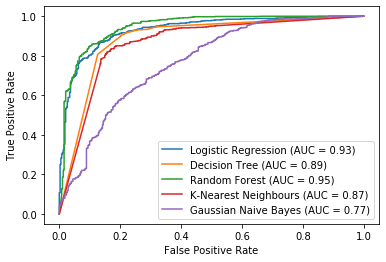

In [67]:
#Splitting train and test datasets, 80% of dataset is used for training and 20% for testing
zomato_x_train, zomato_x_test, zomato_y_train, zomato_y_test = train_test_split(zomato_x, zomato_y, test_size=0.2)
    
#Logistic regression algorithm application
lg_reg = LogisticRegression(solver='lbfgs', max_iter=500)
model_lg_reg = lg_reg.fit(zomato_x_train, zomato_y_train)
lg_reg_predictions = model_lg_reg.predict_proba(zomato_x_test)      
fpr_lg_reg, tpr_lg_reg, threshold_lg_reg = roc_curve(zomato_y_test, lg_reg_predictions[:,1],drop_intermediate=False)       
auc_lg_reg = auc(fpr_lg_reg, tpr_lg_reg)

#Decision tree algorithm application
dec_tree = tree.DecisionTreeClassifier(splitter='best', min_samples_split=10, max_features=None, max_depth=50, criterion='gini')
model_dec_tree = dec_tree.fit(zomato_x_train, zomato_y_train)
dec_tree_predictions = model_dec_tree.predict_proba(zomato_x_test)
fpr_dec_tree, tpr_dec_tree, threshold_dec_tree = roc_curve(zomato_y_test, dec_tree_predictions[:,1],drop_intermediate=False)       
auc_dec_tree = auc(fpr_dec_tree, tpr_dec_tree)

#Random forest algorithm application
rand_forest = RandomForestClassifier(n_estimators=100, min_samples_split=5, max_features=None, max_depth=50, criterion='gini')
model_rand_forest = rand_forest.fit(zomato_x_train, zomato_y_train)
rand_forest_predictions = model_rand_forest.predict_proba(zomato_x_test)
fpr_rand_forest, tpr_rand_forest, threshold_rand_forest = roc_curve(zomato_y_test, rand_forest_predictions[:,1],drop_intermediate=False)       
auc_rand_forest = auc(fpr_rand_forest, tpr_rand_forest)

#KNN algorithm application
knn = KNeighborsClassifier(weights='distance', n_neighbors=2, metric='euclidean', algorithm='brute')
model_knn = knn.fit(zomato_x_train, zomato_y_train)
knn_predictions = model_knn.predict_proba(zomato_x_test)
fpr_knn, tpr_knn, threshold_knn = roc_curve(zomato_y_test, knn_predictions[:,1],drop_intermediate=False)       
auc_knn = auc(fpr_knn, tpr_knn)

#Gaussian naive bayes algorithm application
gaussian_naive_bayes = GaussianNB(var_smoothing=1)
model_gaussian_naive_bayes = gaussian_naive_bayes.fit(zomato_x_train, zomato_y_train)
gaussian_naive_bayes_predictions = model_gaussian_naive_bayes.predict_proba(zomato_x_test)
fpr_gaussian_naive_bayes, tpr_gaussian_naive_bayes, threshold_gaussian_naive_bayes = roc_curve(zomato_y_test, gaussian_naive_bayes_predictions[:,1],drop_intermediate=False)       
auc_gaussian_naive_bayes = auc(fpr_gaussian_naive_bayes, tpr_gaussian_naive_bayes)

plt.plot(fpr_lg_reg, tpr_lg_reg,label='Logistic Regression (AUC = %0.2f)' % auc_lg_reg)
plt.plot(fpr_dec_tree, tpr_dec_tree,label='Decision Tree (AUC = %0.2f)' % auc_dec_tree)
plt.plot(fpr_rand_forest, tpr_rand_forest,label='Random Forest (AUC = %0.2f)' % auc_rand_forest)
plt.plot(fpr_knn, tpr_knn,label='K-Nearest Neighbours (AUC = %0.2f)' % auc_knn)
plt.plot(fpr_gaussian_naive_bayes, tpr_gaussian_naive_bayes,label='Gaussian Naive Bayes (AUC = %0.2f)' % auc_gaussian_naive_bayes)

plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

##### Overall comparison of models

In [68]:
models = pd.DataFrame(["Logistic Regression","Decision Tree","Random Forest","KNN","Naive Bayes"], columns =["Model"])
accuracies_test = pd.DataFrame([round(accuracy_lg_reg_test,3),round(accuracy_dec_tree_test,3),round(accuracy_rand_forest_test,3),round(accuracy_knn_test,3),round(accuracy_gaussian_naive_bayes_test,3)], columns=["Accuracy (Test set)"])
accuracies_train = pd.DataFrame([round(accuracy_lg_reg_train,3),round(accuracy_dec_tree_train,3),round(accuracy_rand_forest_train,3),round(accuracy_knn_train,3),round(accuracy_gaussian_naive_bayes_train,3)], columns=["Accuracy (Train set)"])
precisions_test = pd.DataFrame([round(precision_lg_reg_test,3),round(precision_dec_tree_test,3),round(precision_rand_forest_test,3),round(precision_knn_test,3),round(precision_gaussian_naive_bayes_test,3)], columns=["Precision (Test set)"])
#precisions_train = pd.DataFrame([round(precision_lg_reg_train,3),round(precision_dec_tree_train,3),round(precision_rand_forest_train,3),round(precision_knn_train,3),round(precision_gaussian_naive_bayes_train,3)], columns=["Precision (Train set)"])
recalls_test = pd.DataFrame([round(recall_lg_reg_test,3),round(recall_dec_tree_test,3),round(recall_rand_forest_test,3),round(recall_knn_test,3),round(recall_gaussian_naive_bayes_test,3)], columns=["Recall (Test set)"])
#recalls_train = pd.DataFrame([round(recall_lg_reg_train,3),round(recall_dec_tree_train,3),round(recall_rand_forest_train,3),round(recall_knn_train,3),round(recall_gaussian_naive_bayes_train,3)], columns=["Recall (Train set)"])
fmeasures_test = pd.DataFrame([round(fmeasure_lg_reg_test,3),round(fmeasure_dec_tree_test,3),round(fmeasure_rand_forest_test,3),round(fmeasure_knn_test,3),round(fmeasure_gaussian_naive_bayes_test,3)], columns=["Fmeasure (Test set)"])
#fmeasures_train = pd.DataFrame([round(fmeasure_lg_reg_train,3),round(fmeasure_dec_tree_train,3),round(fmeasure_rand_forest_train,3),round(fmeasure_knn_train,3),round(fmeasure_gaussian_naive_bayes_train,3)], columns=["Fmeasure (Train set)"])
auc = pd.DataFrame([round(auc_lg_reg,3),round(auc_dec_tree,3),round(auc_rand_forest,3),round(auc_knn,3),round(auc_gaussian_naive_bayes,3)], columns=["AUC"])
times_test = pd.DataFrame([round(time_lg_reg_test,2),round(time_dec_tree_test,2),round(time_rand_forest_test,2),round(time_knn_test,2),round(time_gaussian_naive_bayes_test,2)], columns=["Time spent,s"])
comparison = pd.concat([models,accuracies_train,accuracies_test,precisions_test,recalls_test,fmeasures_test,auc,times_test], axis=1)
comparison  = comparison.sort_values(["Accuracy (Test set)"], ascending = False)
comparison  = comparison.reset_index(drop=True)

comparison

,Model,Accuracy (Train set),Accuracy (Test set),Precision (Test set),Recall (Test set),Fmeasure (Test set),AUC,"Time spent,s"
0,Random Forest,0.991,0.890,0.905,0.941,0.922,0.946,93.26
1,Logistic Regression,0.946,0.876,0.882,0.949,0.914,0.932,13.90
2,Decision Tree,0.977,0.871,0.904,0.911,0.907,0.887,1.94
3,KNN,1.000,0.839,0.893,0.873,0.883,0.866,1.02
4,Naive Bayes,0.750,0.747,0.737,0.989,0.844,0.769,1.31
